<a href="https://colab.research.google.com/github/anandkc812/data-analytics/blob/master/Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt2
#import pydeck as pdk
from PIL import Image
import seaborn as sns
import time

In [25]:
from google.colab import drive
PATH = 'gdrive/My Drive/data/Corona/'

print(PATH)


drive.mount('/content/gdrive')

#!unzip -q gdrive/'My Drive'/data/creditcardfraud.zip

#st.title('Coronavirus COVID19 Visualization')
#st.sidebar.title('Coronavirus')
#image = Image.open('D:/DataScience/image.jpg')
#st.sidebar.image(image, caption='Coronaviruse', use_column_width=True)
#st.sidebar.subheader('Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans. ')

data_ll       = pd.read_csv(PATH+'COVID19_line_list_data.csv')
data_ol       = pd.read_csv(PATH+'COVID19_open_line_list.csv')
data          = pd.read_csv(PATH+'covid_19_data.csv')
data_ts_death = pd.read_csv(PATH+'time_series_covid_19_deaths.csv')
data_ts_recov = pd.read_csv(PATH+'time_series_covid_19_recovered.csv')
data_ts_conf  = pd.read_csv(PATH+'time_series_covid_19_confirmed.csv')

data.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_death.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_recov.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_conf.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)

print("Config Complete")

gdrive/My Drive/data/Corona/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Config Complete


68 68


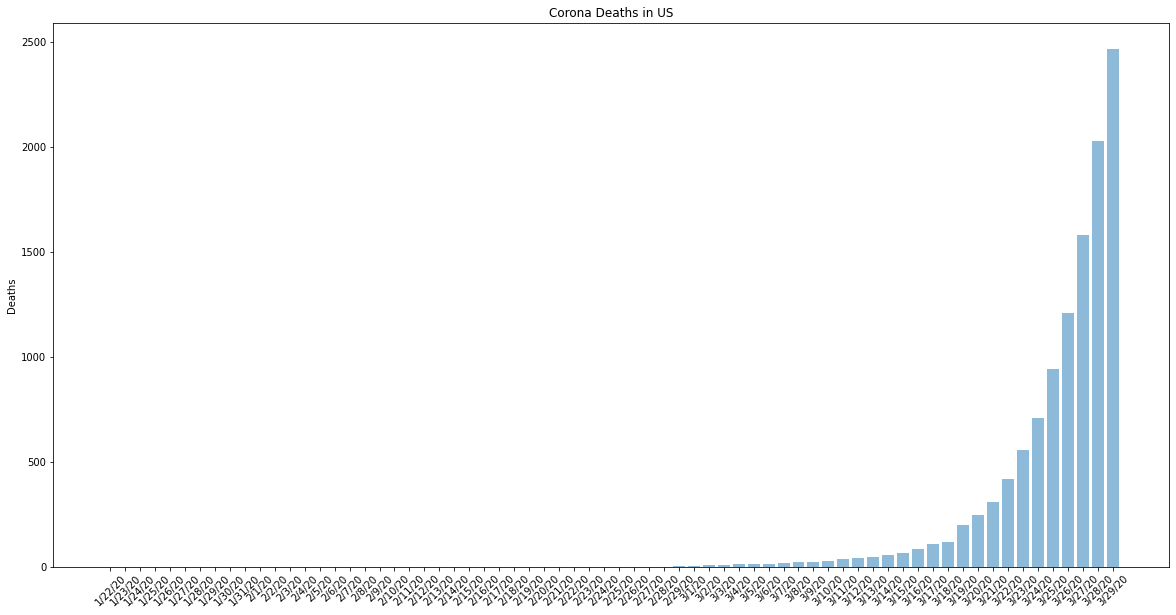

In [66]:

def plot_bar(x, y, ylable, Title):
    

    plt.figure(figsize=(20,10))
    print(len(x), len(y))

    plt.bar(x, y, align='center', alpha=0.5)
    plt.xticks(x, x, rotation=45)
    plt.ylabel(ylable)
    plt.title(Title)

    plt.show()


d = data_ts_death.drop(['Province_State','Lat','Long'], axis=1)
idx = d[d['Country_Region']== 'US' ].index.item()

df = d.loc[idx]
x2 = df[1:]

df = d['Country_Region'].value_counts()


plot_bar(x2.index, x2.iloc[0:,], "Deaths", "Corona Deaths in US")

